In [1]:
import csv
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('results.csv')
df = df.fillna(0)
df.head()

,name,politics,sports,competitive,prez,lucky,spiritual,where to live,i hate,i love
0,Chris,1.0,yes,yes,biden,2.0,nah mate,I am captain of a ship and I sail the oceans b...,I hate when I get pebbles in my shoes!,working out and combat fighting
1,Mystery Person,0.0,yes,no,biden,0.0,nah mate,I live in a hot-air ballon and can go anywhere...,I hate it when someone explains something to m...,hikes
2,David Holz,1.0,no,no,i don't like either of them,3.0,yes,I live in a hot-air ballon and can go anywhere...,I hate when I get pebbles in my shoes!,hikes
3,Raffi Hotter,2.0,yes,yes,biden,4.0,nah mate,I live in a hot-air ballon and can go anywhere...,I hate it when someone explains something to m...,hikes
4,Noah,2.0,no,no,i don't like either of them,5.0,yes,i have a coupon for unlimited chocolate for th...,I hate it when someone explains something to m...,hikes


In [2]:
n = df.shape[0]

In [3]:
matrix = list(np.zeros((n,n)))

In [4]:
def delta(a,b):
    if a==b:return 1
    return 0
def surprisal(pers_idx,q_idx):
    col = list(df.iloc[:,q_idx])
    p = sum([delta(col[pers_idx],i) for i in col]) / len(col)
    #print("p:",p)#trace
    return -math.log2(p)

In [5]:
def to_3_sig_fig(x):# float
    if x==0: return 0
    return round(x, 2-int(math.floor(math.log10(abs(x)))))
def normalize_matrix(m):
    return m / max(m.flatten())
def round_matrix(m):
    return np.array([[to_3_sig_fig(i) for i in row] for row in m])

In [6]:
for i in df['name']:
    print(i)

Chris
Mystery Person
David Holz
Raffi Hotter
Noah
Dmitri Brereton
Dhruvik Parikh
Harshu
Steve
vincent
Marley Xiong
Tiago
Liam Hinzman
Athena
Matthew
Jonathan


In [7]:
df.shape[1]

10

In [8]:
for i in range(n):
    for j in range(i+1,len(df['name'])):
        # find info on two people here
        aname,bname = df.iloc[i][0] , df.iloc[j][0]
        a = df.iloc[i][:]
        b = df.iloc[j][:]
        print(aname,bname)
        # compute their similarity / agreement
        delta_ab = np.array([delta(a[k],b[k]) for k in range(df.shape[1])])
        surp_i = np.array([surprisal(i,k) for k in range(df.shape[1])])
        sim = np.dot(delta_ab,surp_i)
        #print("delta {}\nsurp {}\nsim {}\n\n".format(delta_ab,surp_i,sim))#trace
        #input()
        matrix[i][j] = sim
        matrix[j][i] = sim

Chris Mystery Person
Chris David Holz
Chris Raffi Hotter
Chris Noah
Chris Dmitri Brereton
Chris Dhruvik Parikh
Chris Harshu
Chris Steve
Chris vincent
Chris Marley Xiong
Chris Tiago
Chris Liam Hinzman
Chris Athena
Chris Matthew
Chris Jonathan
Mystery Person David Holz
Mystery Person Raffi Hotter
Mystery Person Noah
Mystery Person Dmitri Brereton
Mystery Person Dhruvik Parikh
Mystery Person Harshu
Mystery Person Steve
Mystery Person vincent
Mystery Person Marley Xiong
Mystery Person Tiago
Mystery Person Liam Hinzman
Mystery Person Athena
Mystery Person Matthew
Mystery Person Jonathan
David Holz Raffi Hotter
David Holz Noah
David Holz Dmitri Brereton
David Holz Dhruvik Parikh
David Holz Harshu
David Holz Steve
David Holz vincent
David Holz Marley Xiong
David Holz Tiago
David Holz Liam Hinzman
David Holz Athena
David Holz Matthew
David Holz Jonathan
Raffi Hotter Noah
Raffi Hotter Dmitri Brereton
Raffi Hotter Dhruvik Parikh
Raffi Hotter Harshu
Raffi Hotter Steve
Raffi Hotter vincent
Raffi H

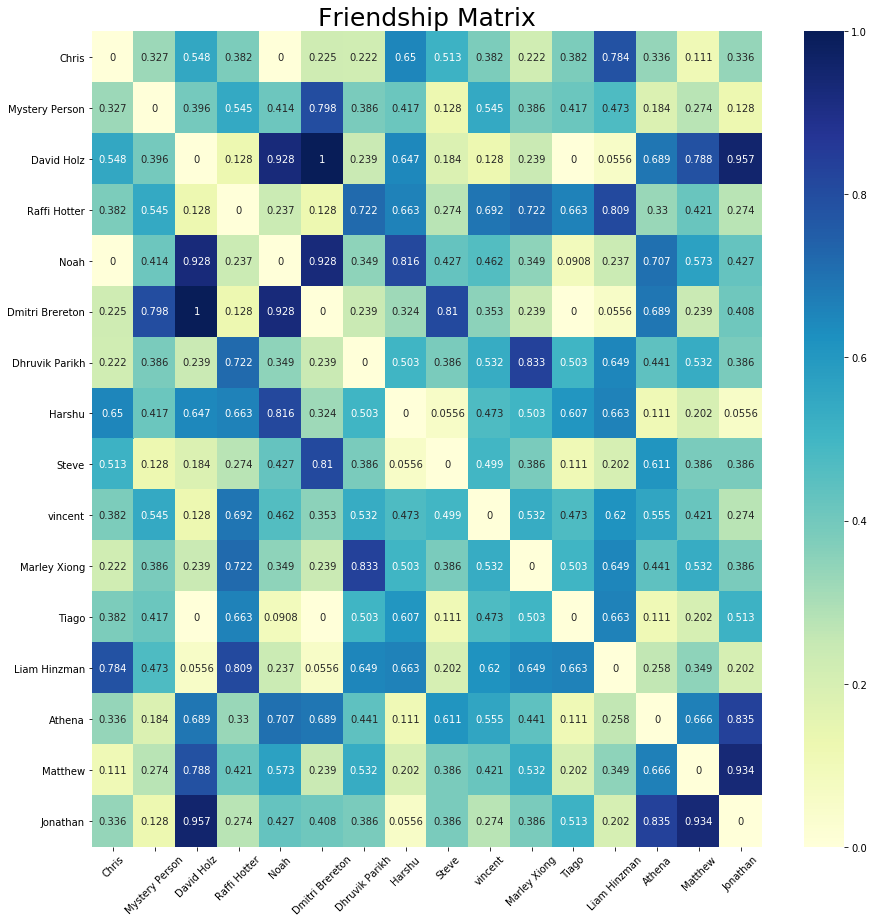

In [9]:
matrix = normalize_matrix(np.array(matrix))
matrix = round_matrix(matrix)
labs = df['name']

plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot=True, fmt='g', xticklabels=labs, yticklabels=labs,cmap='YlGnBu')
plt.yticks(rotation=0) 
plt.xticks(rotation=45)
plt.title('Friendship Matrix',fontsize=25)
plt.savefig('friendship_matrix.png')
plt.show()


write the matrix to a csv

In [10]:
with open('stephen_survey_results.csv','w') as f:
    f.write(',')
    [f.write('{},'.format(name)) for name in df['name']]
    f.write('\n')
    for name,row in zip(df['name'],matrix):
        f.write('{},'.format(name))
        [f.write('{},'.format(i)) for i in row]
        f.write('\n')
    

### now find each person's entropy and friendliness

In [11]:
entropy_dic = {}
friendliness_dic = {}

for i in range(n):
    name = df.iloc[i][0]
    surp_i = np.array([surprisal(i,k) for k in range(1,df.shape[1])])
    entropy_dic[name]= sum(surp_i)
    friendliness_dic[name] = sum(matrix[i])

In [12]:
print("name\tentropy\tfriendliness")
for name in entropy_dic:
    print("{}\t{}\t{}".format(name,entropy_dic[name],friendliness_dic[name]))

name	entropy	friendliness
Chris	16.945904479449254	5.420000000000001
Mystery Person	13.071435361533114	5.8180000000000005
David Holz	13.9718996879822	6.9266000000000005
Raffi Hotter	6.579582265203436	6.990000000000001
Noah	12.957400118287083	6.944799999999999
Dmitri Brereton	15.141824689424512	6.4356
Dhruvik Parikh	6.217012185818729	6.922000000000001
Harshu	12.360941978728098	6.6902
Steve	14.556862188703352	5.358600000000001
vincent	6.842616671037231	6.941
Marley Xiong	6.217012185818729	6.922000000000001
Tiago	15.945904479449254	5.2387999999999995
Liam Hinzman	9.039013883840735	6.669200000000001
Athena	8.328043498207471	6.9639999999999995
Matthew	8.065009092373678	6.63
Jonathan	11.649971593094834	6.5016


In [13]:
# write the entropy in bootsnote-format table .txt file
with open('entropy_table.txt','w') as f:
    f.write("|name|surprisal (think entropy)|friendliness|\n|:---:|---:|---:|\n")
    for name in entropy_dic:
        ent = entropy_dic[name]
        fri = friendliness_dic[name]
        f.write("|{}|{}|{}|\n".format(name,to_3_sig_fig(ent),to_3_sig_fig(fri)))